In [12]:
%matplotlib nbagg
#Import required libraries
from serial import Serial
import csv
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from drawnow import drawnow, figure
from scipy import stats
import scipy.signal as signal
import pandas as pd

In [30]:

def get_rolling_slope(csv_data,is_sensor_data):
    
    #Load sensor
    if is_sensor_data =='load':
        datapnt_delay = 101
        fps = 1000/datapnt_delay
        window_width = 8
        
        
        
        
    elif is_sensor_data =='light':
        datapnt_delay = 163
        fps = 1000/datapnt_delay
        window_width = 8
        
        
        
        
        
        
        
    else:
        #Sampled every 5 seconds
        fps = 1
        window_width = 3
    slope = []
    raw_data = []
    for i in range(len(csv_data)):
        val = csv_data[i]
        raw_data.append(val)
        if i>window_width*fps:
            curr_window = raw_data[int(-window_width*fps):]
            x =list(range(len(curr_window)))
            curr_slope, intercept, r, p, std_err = stats.linregress(x, curr_window)
            slope.append(curr_slope)
        else:
            slope.append(0) 
    return slope


<IPython.core.display.Javascript object>


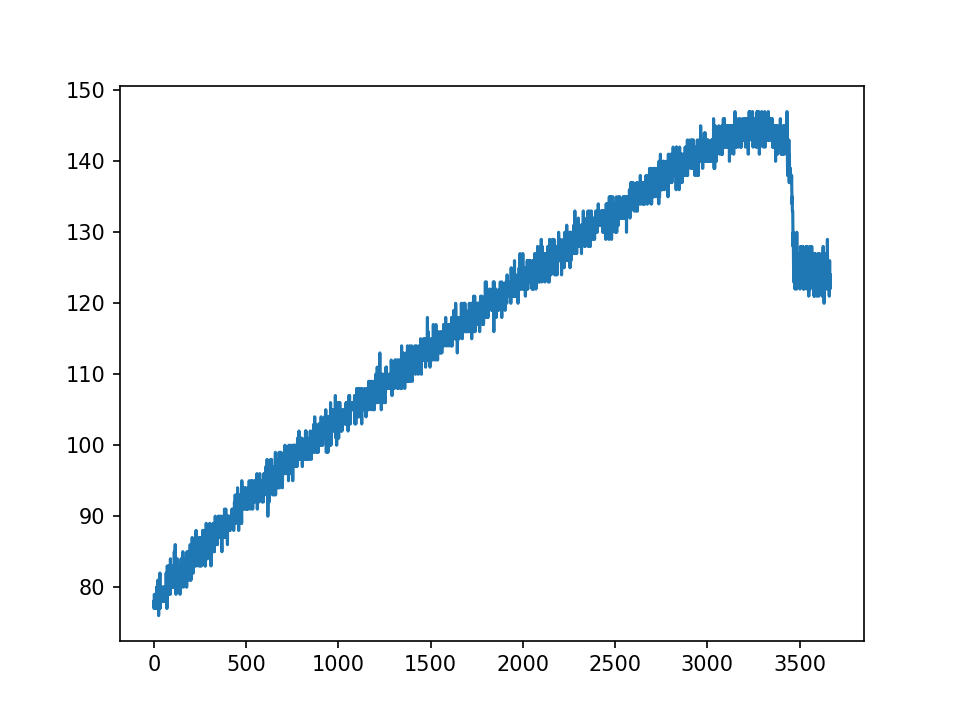

In [33]:
#Read sensor data
csv_name = r'\light_higher_4.csv'
csv_path =r'C:\Users\a_hop\repos\fydp-neofeed\sensor_data\2022-02-03 Testing - Height Change Required'+csv_name
file = open(csv_path)
csvreader = csv.reader(file)
csv_data = np.asarray(list(csvreader))
csv_data = np.asfarray(csv_data,float).flatten()[300:8000]
slope = get_rolling_slope(csv_data,'load')
plt.plot(csv_data)
plt.show()

<IPython.core.display.Javascript object>


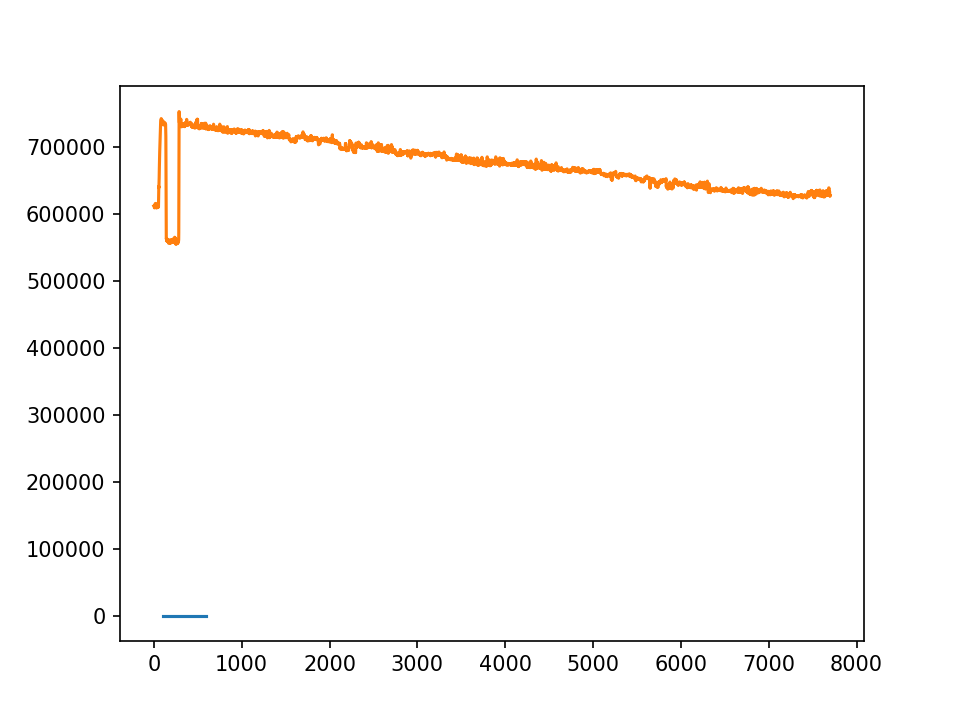

In [26]:
#Read real data
csv_name = r'\real_load_allresults.csv'
csv_path =r'C:\Users\a_hop\repos\fydp-neofeed\sensor_data\2022-02-03 Testing - Height Change Required'+csv_name
csv_data = pd.read_csv(csv_path)
slope = get_rolling_slope(csv_data['Trial 1 30 mL (g)'],False)
plt.figure()
plt.plot(csv_data['Time (s)'][22:120],slope[22:120])
plt.show()

<IPython.core.display.Javascript object>


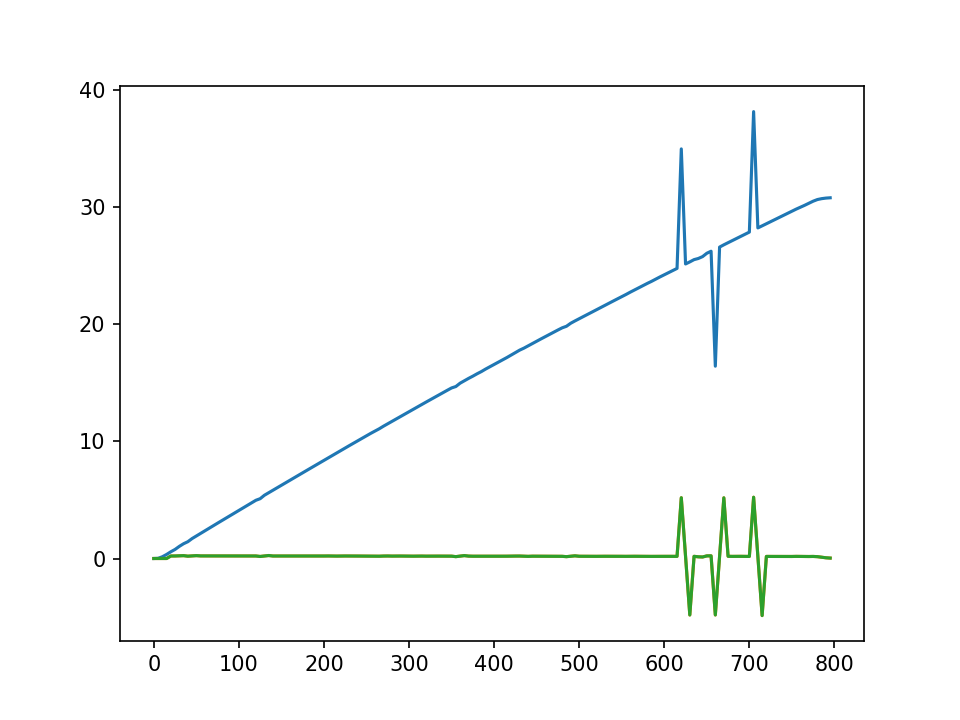

In [16]:
plt.plot(csv_data['Time (s)'],csv_data['Trial 1 30 mL (g)'])